<h1>Weather-Induced Fluctuations in Singapore's Tourism Sector</h1>

<h2>Table of Content</h2>
1. <a href='#1'>Introduction</a> <br>
2. <a href='#2'>Loading Packages and Prepping Data</a><br>
3. <a href='#3'>Exploratory Data Analysis</a><br>
4. <a href='#4'>Data Analysis and Visualization</a><br>
5. <a href='#5'>Conclusion</a><br>

## <a id='1'>Introduction</a>

Many studies had been performed over the past decades to elucidate the relationships between weather and tourism. It had been shown that timing of travel and destination choice made by tourists are highly influenced by weather and climate (Gössling et al., 2016). Weather also has a huge influence on activities, experiences and satisfaction (Steiger et al., 2016). <br>
A study done between 2013 and 2014 revealed that their discussion with 22 respondents predominantly revolved around rain, when prompted about weather in their past travels. Every respondent had pointed out that rain led to a negative holiday experience. Among all the negative weather experiences mentioned by the respondents, rain stood out as the most frequently cited memory. Reasons given includes ‘last-minute change of plans’ and ‘lack of indoor activities’ (Gössling et al., 2016).  
A separate study showed that summer tourists on average, can accept up to 2.1 days of continuous rain for a 1-week holiday (Steiger et al., 2016). Singapore is country with high number of rainy days and two monsoon seasons. Therefore, this analysis will look at whether rainy seasons will affect our tourism rate.<br>
Due to COVID-19 situation, we will ignore the tourist statistics from 2020 to present. To simplify the analysis, multiple countries had been grouped into regions to look at their tourism trend in Singapore. The regions we are analysing are Southeast Asia, Greater China, North Asia, West Asia, Americas, Europe, Oceania and Africa. The list of countries in each region are listed in the README file.<br>


References:<br>
<small>Gössling, S., Abegg, B., & Steiger, R. (2016). “It Was Raining All the Time!”: Ex Post Tourist Weather Perceptions. Atmosphere, 7(1), Article 1. https://doi.org/10.3390/atmos7010010 <br>
Steiger, R., Abegg, B., & Jänicke, L. (2016). Rain, Rain, Go Away, Come Again Another Day. Weather Preferences of Summer Tourists in Mountain Environments. Atmosphere, 7(5), Article 5. https://doi.org/10.3390/atmos7050063</small>




## <a id='2'>Loading Packages and Prepping Data</a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')

In [2]:
#Datasets:
highest_daily_rainfall = pd.read_csv('data/rainfall-monthly-highest-daily-total.csv')
no_of_rain_monthly = pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv')
total_monthly_rainfall = pd.read_csv('data/rainfall-monthly-total.csv')
mean_relative_humidity = pd.read_csv('data/relative-humidity-monthly-mean.csv')
sunshine_duration = pd.read_csv('data/sunshine-duration-monthly-mean-daily-duration.csv')
surface_air_temp = pd.read_csv('data/surface-air-temperature-monthly-mean.csv')
profile = pd.read_excel('data/tourism-industry-profile-monthly.xlsx', sheet_name = 'T1')

In [3]:
#This project will only focus on 5 years trends starting from pre-COVID19 period [Jan 2015 to Dec 2019]
#profile_5 = profile.loc[:, '2019 Dec':'2015 Jan']
#profile = pd.concat([profile.iloc[:,0], profile], axis=1)
#To look at general trends by regions (a group of countries)
profile_by_region = profile.iloc[[1, 10, 15, 25, 32, 36, 52, 56], :] #only selecting rows of interest
profile_by_region = profile_by_region.rename({'Data Series':'Index'}, axis = 1)
profile_by_region = profile_by_region.T 
profile_by_region.columns = profile_by_region.iloc[0]
profile_by_region = profile_by_region[1:]
profile_by_region = profile_by_region[::-1] #reversing the date row order so that it will go from oldest to latest
profile_by_region = profile_by_region.reset_index()
profile_by_region = profile_by_region.rename({'index':'month'}, axis = 1)
profile_by_region.columns = profile_by_region.columns.str.strip() #removing white space in column title from the csv

In [4]:
profile_by_region.head()

Index,month,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa
0,1978 Jan,64500,na,na,1420,10105,25643,32710,587
1,1978 Feb,57650,na,na,1455,9996,26929,17189,354
2,1978 Mar,63299,na,na,3740,11982,29549,19637,405
3,1978 Apr,73782,na,na,2007,13951,25613,20123,736
4,1978 May,68036,na,na,2039,17022,20421,26288,514


In [5]:
#converting the 'na' string to NaN so that I can change the columns to int later
profile_by_region = profile_by_region.replace('na', np.nan) 

In [6]:
#to standardize the {year-month} format between different datasets for easier merging and analysis
def convert_date(the_df, month_col):
    monthdict = {'-01':' Jan', '-02':' Feb', '-03':' Mar', '-04':' Apr', '-05':' May', '-06':' Jun', '-07':' Jul','-08':' Aug', '-09':' Sep', '-10':' Oct', '-11':' Nov', '-12':' Dec'}
    the_df[month_col] = the_df.replace({month_col:monthdict}, regex=True)[month_col]
    return the_df

In [7]:
#merging different datasets into one dataframe
datasets = [highest_daily_rainfall, no_of_rain_monthly, total_monthly_rainfall, mean_relative_humidity, sunshine_duration]
for dataset in datasets:
    dataset = convert_date(dataset, 'month')
    profile_by_region = profile_by_region.merge(dataset, on = 'month')

In [8]:
profile_by_region

,month,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs
0,1982 Jan,86569,NaN,NaN,3687,12654,37600,32964,1570,36.5,10,107.1,81.2,5.6
1,1982 Feb,80910,NaN,NaN,3366,15162,37046,21465,1112,9.4,5,27.8,79.5,7.6
2,1982 Mar,82332,NaN,NaN,3924,15901,39669,25585,922,61.7,11,160.8,82.3,5.1
3,1982 Apr,90806,NaN,NaN,3690,16164,35613,24377,955,45.1,14,157.0,85.9,4.7
4,1982 May,95876,NaN,NaN,3222,17131,30016,27511,868,33.0,10,102.2,83.2,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2022 Apr,137294,13729.0,9940.0,3997,14729,32971,29323,814,58.8,18,239.6,80.0,5.2
484,2022 May,204656,17723.0,16953.0,5283,25106,42110,35326,1300,44.6,12,102.0,76.5,6.7
485,2022 Jun,269088,23566.0,25153.0,5839,36723,48879,55574,2184,59.4,17,211.8,79.1,4.7
486,2022 Jul,332161,35493.0,40886.0,12301,47365,83308,77575,2582,27.8,16,145.2,76.8,6.2


In [9]:
#creating new column for the year and month
profile_by_region = profile_by_region.rename({'month':'Time Period'}, axis = 1)
profile_by_region['year'] = profile_by_region['Time Period'].str[:5].astype('int64')
profile_by_region['month'] = profile_by_region['Time Period'].str[5:]
profile_by_region.iloc[:,1:9] = profile_by_region.iloc[:,1:9].astype('float64')

In [10]:
profile_by_region.head()

,Time Period,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year,month
0,1982 Jan,86569.0,NaN,NaN,3687.0,12654.0,37600.0,32964.0,1570.0,36.5,10,107.1,81.2,5.6,1982,Jan
1,1982 Feb,80910.0,NaN,NaN,3366.0,15162.0,37046.0,21465.0,1112.0,9.4,5,27.8,79.5,7.6,1982,Feb
2,1982 Mar,82332.0,NaN,NaN,3924.0,15901.0,39669.0,25585.0,922.0,61.7,11,160.8,82.3,5.1,1982,Mar
3,1982 Apr,90806.0,NaN,NaN,3690.0,16164.0,35613.0,24377.0,955.0,45.1,14,157.0,85.9,4.7,1982,Apr
4,1982 May,95876.0,NaN,NaN,3222.0,17131.0,30016.0,27511.0,868.0,33.0,10,102.2,83.2,5.8,1982,May


In [11]:
profile_by_region.info() #missing the first 288 visitors stats for Greater China and North Asia 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time Period                488 non-null    object 
 1   Southeast Asia             488 non-null    float64
 2   Greater China              200 non-null    float64
 3   North Asia                 200 non-null    float64
 4   West Asia                  488 non-null    float64
 5   Americas                   488 non-null    float64
 6   Europe                     488 non-null    float64
 7   Oceania                    488 non-null    float64
 8   Africa                     488 non-null    float64
 9   maximum_rainfall_in_a_day  488 non-null    float64
 10  no_of_rainy_days           488 non-null    int64  
 11  total_rainfall             488 non-null    float64
 12  mean_rh                    488 non-null    float64
 13  mean_sunshine_hrs          488 non-null    float64

-----------------

## <a id='3'>Exploratory Data Analysis</a>

<h3>1. Exploring Singapore weather trend over 10 years

In [16]:
#filtering to look at the weather trend from Jan 2012 to Dec 2021
ten_years_weather = profile_by_region[(profile_by_region['year'] < 2022) & (profile_by_region['year'] > 2011)].iloc[:,9:]

In [22]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#general overview of the monthly trends with outliers
ten_years_weather.groupby('month').mean().reindex(months)

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
month,,,,,,
Jan,59.68,13.5,197.91,81.26,5.92,2016.5
Feb,29.82,8.5,95.46,78.55,7.44,2016.5
Mar,38.27,9.7,110.00,77.92,7.07,2016.5
Apr,40.06,15.3,161.60,79.39,6.28,2016.5
May,43.76,15.4,180.46,80.21,5.92,2016.5
Jun,35.44,13.8,128.40,78.16,5.70,2016.5
Jul,38.16,14.1,131.10,77.87,6.39,2016.5
Aug,38.60,14.4,146.52,77.54,6.11,2016.5
Sep,35.32,12.9,127.59,77.29,5.66,2016.5


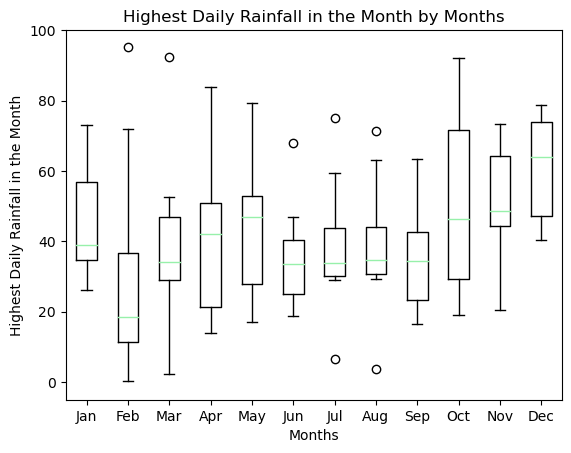

In [54]:
max_rainfall_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['maximum_rainfall_in_a_day'].to_list()
    max_rainfall_list.append(data)
fig, ax = plt.subplots()
ax.boxplot(max_rainfall_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.ylim((-5, 100))
plt.title('Highest Daily Rainfall in the Month by Months')
plt.xlabel('Months')
plt.ylabel('Highest Daily Rainfall in the Month')
plt.show()

Rains in February tends to be smaller than the rain in other months. Heavier rains can be expected between April and May, and between October and January.

<Figure size 640x480 with 0 Axes>

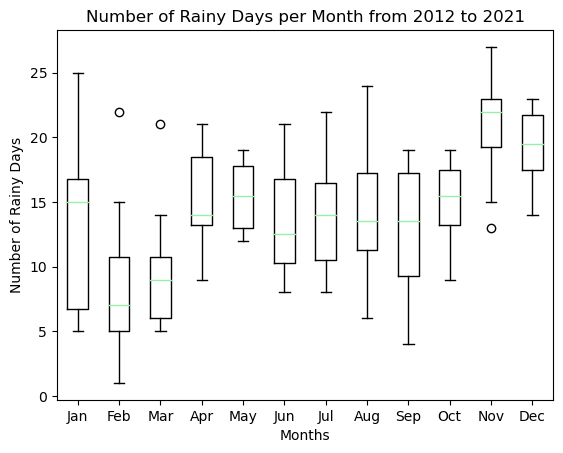

In [51]:
rainy_day_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['no_of_rainy_days'].to_list()
    rainy_day_list.append(data)
plt.figure(figsize = (6.4, 4.8))
fig, ax = plt.subplots()
ax.boxplot(rainy_day_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.title('Number of Rainy Days per Month from 2012 to 2021')
plt.xlabel('Months')
plt.ylabel('Number of Rainy Days')
plt.show()

The general trend for number of rainy days per month was that February is a dry month with little rain. Number of rainy days increases during March to April, and stays relatively consistent from May to September. October saw more rainy days than the previous months, which continues to increase in number of wet days in November and December before decreasing in January.

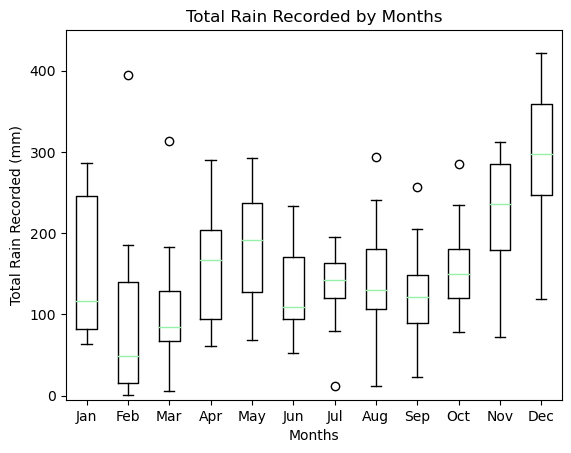

In [64]:
total_rainfall_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['total_rainfall'].to_list()
    total_rainfall_list.append(data)
fig, ax = plt.subplots()
ax.boxplot(total_rainfall_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.title('Total Rain Recorded by Months')
plt.xlabel('Months')
plt.ylabel('Total Rain Recorded (mm)')
plt.ylim((-5,450))
plt.show()

Similar to the trend for maximum daily rain and number of rainy days, we can see a consistent trend that April to May and October to January tend to be wetter months compared to the other months. February is the dryest month.

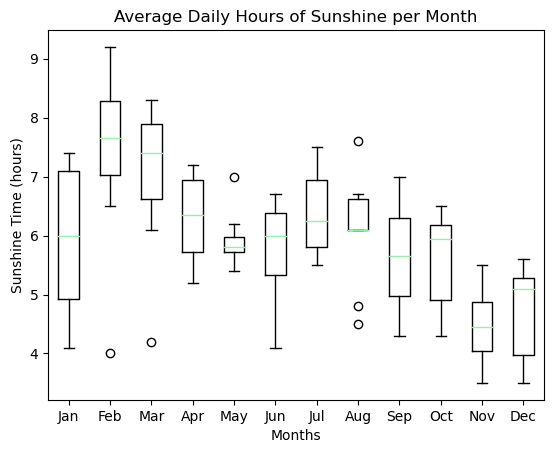

In [60]:
sunshine_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['mean_sunshine_hrs'].to_list()
    sunshine_list.append(data)
fig, ax = plt.subplots()
ax.boxplot(sunshine_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.title('Average Daily Hours of Sunshine per Month')
plt.xlabel('Months')
plt.ylabel('Sunshine Time (hours)')
plt.show()

The dryer months with lesser rainy days on average have longer average daily sunshine time. 

In [61]:
ten_years_weather.corr()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
maximum_rainfall_in_a_day,1.000000,0.421532,0.833611,0.359236,-0.425542,0.011896
no_of_rainy_days,0.421532,1.000000,0.673883,0.646882,-0.733604,-0.058511
total_rainfall,0.833611,0.673883,1.000000,0.576942,-0.632134,0.005237
mean_rh,0.359236,0.646882,0.576942,1.000000,-0.568989,-0.315776
mean_sunshine_hrs,-0.425542,-0.733604,-0.632134,-0.568989,1.000000,0.159629
year,0.011896,-0.058511,0.005237,-0.315776,0.159629,1.000000


(-5.0, 100.0)

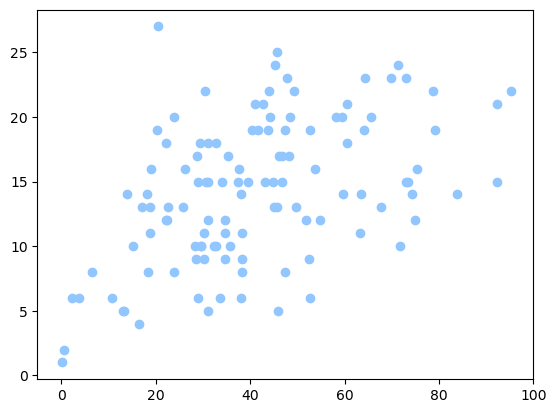

In [74]:
plt.scatter(ten_years_weather['maximum_rainfall_in_a_day'], ten_years_weather['no_of_rainy_days'])
plt.xlim((-5,100))


<h2>2. Exploring Tourists Numbers and Trends by Months</h2>

In [69]:
#I will extract out 5 years worth of data to analyze starting from 2019 to avoid COVID-19 years
five_years_tourists = pd.concat([profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2015)].iloc[:,1:9], 
           profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2015)].iloc[:,-2:]], axis=1)

In [70]:
five_years_tourists.head()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,year,month
396,448133.0,207586.0,130360.0,13037.0,64780.0,158529.0,129274.0,6377.0,2015,Jan
397,380389.0,327971.0,113888.0,9073.0,57924.0,147155.0,72276.0,3562.0,2015,Feb
398,461999.0,198908.0,122861.0,16316.0,64764.0,160349.0,79761.0,5138.0,2015,Mar
399,478213.0,243881.0,88349.0,12262.0,49143.0,128157.0,94029.0,6410.0,2015,Apr
400,512074.0,214376.0,96909.0,10058.0,48014.0,99889.0,85227.0,4663.0,2015,May


In [117]:
figlist = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0], [3,1]]

for x in figlist

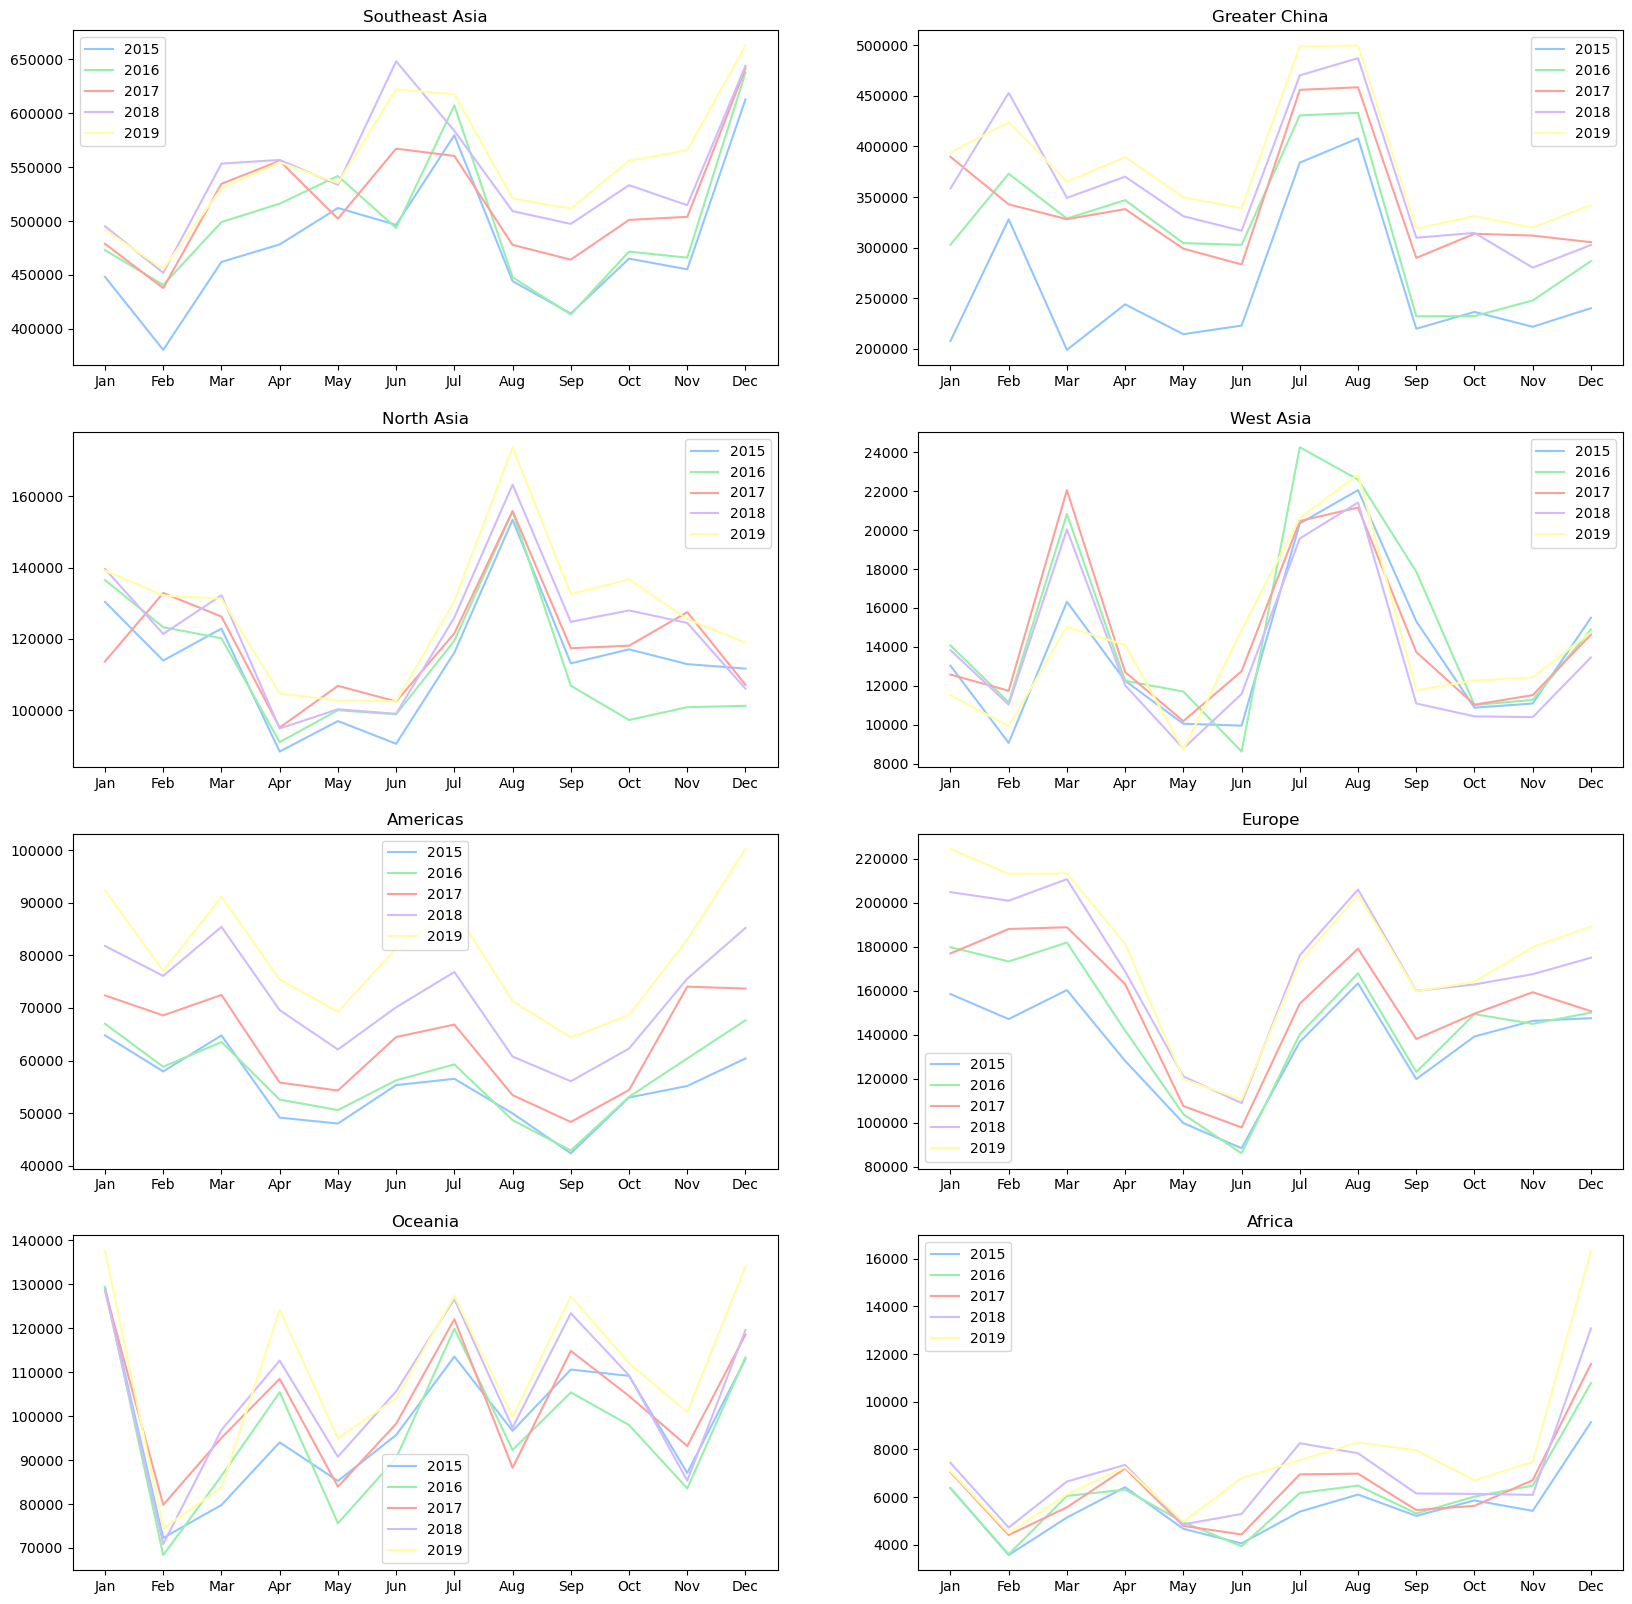

In [124]:
fig, ax = plt.subplots(4,2, figsize = (20,20))

#SEA
for x in five_years_tourists['year'].unique():
    ax[0,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Southeast Asia'], label = x)
ax[0,0].legend()
ax[0,0].title.set_text('Southeast Asia')

#Greater China
for x in five_years_tourists['year'].unique():
    ax[0,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Greater China'], label = x)
ax[0,1].legend()
ax[0,1].title.set_text('Greater China')

#North Asia
for x in five_years_tourists['year'].unique():
    ax[1,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['North Asia'], label = x)
ax[1,0].legend()
ax[1,0].title.set_text('North Asia')

#West Asia
for x in five_years_tourists['year'].unique():
    ax[1,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['West Asia'], label = x)
ax[1,1].legend()
ax[1,1].title.set_text('West Asia')

#Americas
for x in five_years_tourists['year'].unique():
    ax[2,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Americas'], label = x)
ax[2,0].legend()
ax[2,0].title.set_text('Americas')

#Europe
for x in five_years_tourists['year'].unique():
    ax[2,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Europe'], label = x)
ax[2,1].legend()
ax[2,1].title.set_text('Europe')

#Oceania
for x in five_years_tourists['year'].unique():
    ax[3,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Oceania'], label = x)
ax[3,0].legend()
ax[3,0].title.set_text('Oceania')

#Africa
for x in five_years_tourists['year'].unique():
    ax[3,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Africa'], label = x)
ax[3,1].legend()
ax[3,1].title.set_text('Africa')


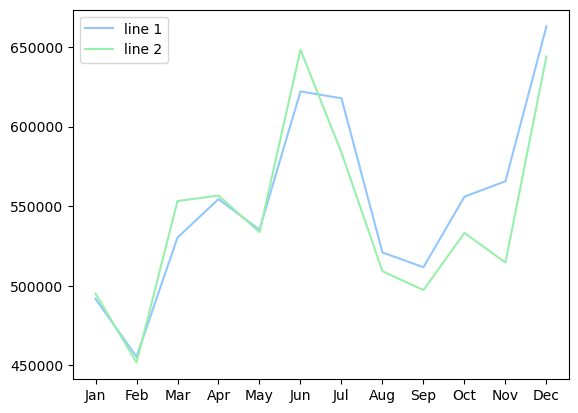

In [93]:
plt.plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==2019]['Southeast Asia'], label = 'line 1')
plt.plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==2018]['Southeast Asia'], label = 'line 2')
plt.legend()

----------------------

## <a id='4'>Data Analysis and Visualization</a>

In [ ]:
profile_by_region[profile_by_region['year']==2018].corr()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
Southeast Asia,1.000000,-0.292747,-0.505919,0.108240,0.278975,-0.476248,0.386716,0.511721,0.255452,0.143217,0.179072,0.023632,-0.395326,NaN
Greater China,-0.292747,1.000000,0.476615,0.633081,-0.016965,0.498041,-0.118013,-0.010153,-0.349901,-0.685762,-0.403195,-0.458215,0.626420,NaN
North Asia,-0.505919,0.476615,1.000000,0.633174,-0.055977,0.705762,0.003276,0.030739,0.002245,-0.129792,0.145668,0.031807,0.124218,NaN
West Asia,0.108240,0.633081,0.633174,1.000000,0.282417,0.609585,0.198139,0.361949,-0.266121,-0.432870,-0.197659,-0.238268,0.229281,NaN
Americas,0.278975,-0.016965,-0.055977,0.282417,1.000000,0.435127,0.042615,0.449901,-0.400927,0.098894,-0.046240,0.472683,-0.218367,NaN
Europe,-0.476248,0.498041,0.705762,0.609585,0.435127,1.000000,-0.025337,0.284785,-0.469535,-0.299258,-0.221939,0.087776,0.377066,NaN
Oceania,0.386716,-0.118013,0.003276,0.198139,0.042615,-0.025337,1.000000,0.526482,0.476204,0.213589,0.567096,0.259283,-0.319983,NaN
Africa,0.511721,-0.010153,0.030739,0.361949,0.449901,0.284785,0.526482,1.000000,0.102484,0.123850,0.197437,0.228295,-0.144229,NaN
maximum_rainfall_in_a_day,0.255452,-0.349901,0.002245,-0.266121,-0.400927,-0.469535,0.476204,0.102484,1.000000,0.405642,0.786716,0.224249,-0.402310,NaN
no_of_rainy_days,0.143217,-0.685762,-0.129792,-0.432870,0.098894,-0.299258,0.213589,0.123850,0.405642,1.000000,0.756207,0.855635,-0.868456,NaN


In [ ]:
test = profile_by_region.pivot_table(index=['month'], values = 'no_of_rainy_days', aggfunc=np.mean)

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
test = test.reindex(months)

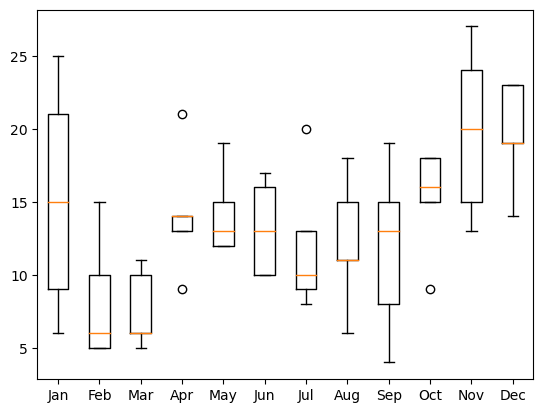

In [ ]:
alist = []
for x in profile_by_region['month'].unique():
    data = profile_by_region[profile_by_region['month'] == x]['no_of_rainy_days'].to_list()
    alist.append(data)
fig, ax = plt.subplots()
ax.boxplot(alist)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.show()

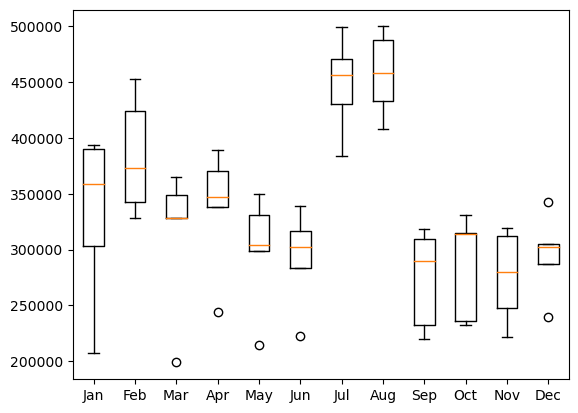

In [ ]:
#for x in profile_by_region['year'].unique():
#    plt.plot(profile_by_region['month'].unique(),profile_by_region[profile_by_region['year']==x]['Greater China'])
#plt.show()

blist = []
for x in profile_by_region['month'].unique():
    data = profile_by_region[profile_by_region['month']==x]['Greater China'].to_list()
    blist.append(data)
fig, ax = plt.subplots()
ax.boxplot(blist)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.show()

In [ ]:
profile_by_region[profile_by_region['year']==x]['Greater China']

Series([], Name: Greater China, dtype: int64)

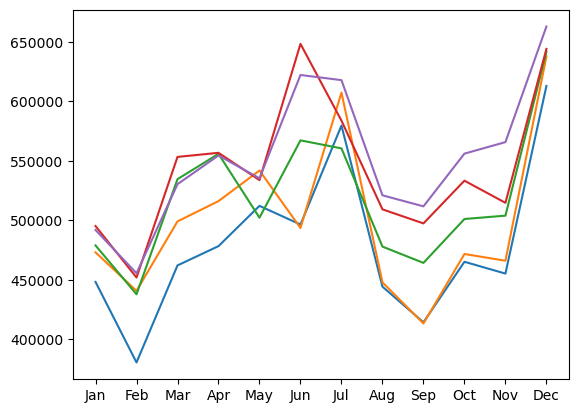

In [ ]:
for x in profile_by_region['year'].unique():
    plt.plot(profile_by_region['month'].unique(),profile_by_region[profile_by_region['year']==x]['Southeast Asia'])
plt.show()

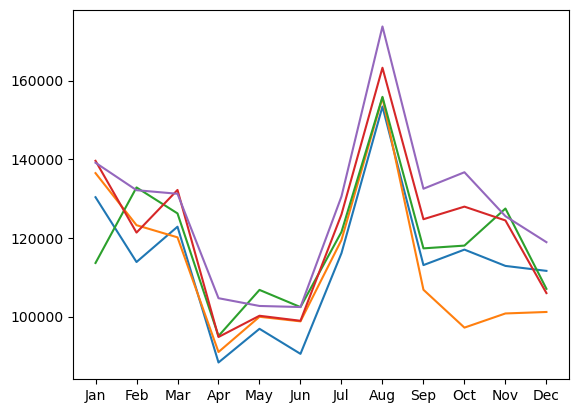

In [ ]:
for x in profile_by_region['year'].unique():
    plt.plot(profile_by_region['month'].unique(),profile_by_region[profile_by_region['year']==x]['North Asia'])
plt.show()

In [ ]:
profile_by_region[profile_by_region['year']==2019]['no_of_rainy_days']

48     9
49     5
50     6
51     9
52    13
53    16
54     8
55     6
56     4
57    15
58    15
59    14
Name: no_of_rainy_days, dtype: int64